In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\25. NLP\\SMSSpamCollection', sep = '\t',names = ['label','message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Text cleaning

In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [6]:
corpus = []
for i in range(len(df)):
    rp = re.sub('[^a-zA-A]', " ", df['message'][i])
    rp = rp.lower()
    rp = rp.split()
    rp = [ps.stem(word) for word in rp if not word in set (stopwords.words('english'))]
    rp = ' '.join(rp)
    corpus.append(rp)

# Vectorization 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
y = pd.get_dummies(df['label'],drop_first = True)

In [9]:
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [24]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# modeling

********************
********************
train_accuracy 0.9930769230769231
test_accuracy 0.9754784688995215
********************
[[1423   28]
 [  13  208]]
********************


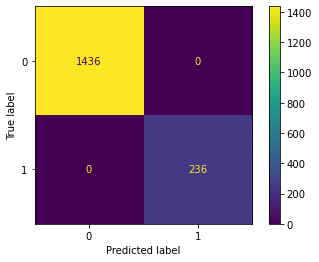

In [11]:
# modeling

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

print('*'*20)
# prediction

test_prediction = model.predict(X_test)
train_prediction = model.predict(X_train)

#evaluation

print('*'*20)
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

print('train_accuracy',accuracy_score(y_train,train_prediction))

print('test_accuracy',accuracy_score(y_test,test_prediction))

print('*'*20)


print(confusion_matrix(y_test,test_prediction))

print('*'*20)

print(plot_confusion_matrix(model,X_test,test_prediction))


# cross validation score

In [12]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model,X,y,cv=5)

print(score)
score.mean()

[0.97757848 0.97757848 0.97755835 0.98025135 0.97486535]


0.9775663991111898

# classification report

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1451
           1       0.88      0.94      0.91       221

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672



# logistic regression 

********************
********************
train_accuracy 0.9935897435897436
test_accuracy 0.9814593301435407
********************
[[1449    2]
 [  29  192]]
********************


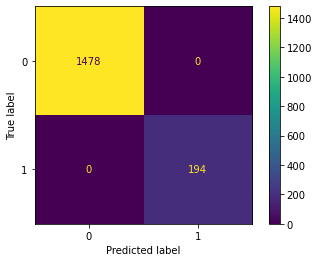

In [14]:
# modeling

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('*'*20)
# prediction

test_prediction = lr.predict(X_test)
train_prediction = lr.predict(X_train)

#evaluation

print('*'*20)
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

print('train_accuracy',accuracy_score(y_train,train_prediction))

print('test_accuracy',accuracy_score(y_test,test_prediction))

print('*'*20)


print(confusion_matrix(y_test,test_prediction))

print('*'*20)

print(plot_confusion_matrix(lr,X_test,test_prediction))

In [15]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model,X,y,cv=5)

print(score)
score.mean()

[0.97757848 0.97757848 0.97755835 0.98025135 0.97486535]


0.9775663991111898

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1451
           1       0.99      0.87      0.93       221

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



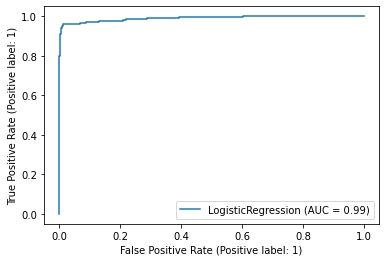

In [17]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr,X_test,y_test)

# decision tree classification

********************
********************
train_accuracy 0.9987179487179487
test_accuracy 0.9742822966507177
********************
[[1436   15]
 [  28  193]]
********************


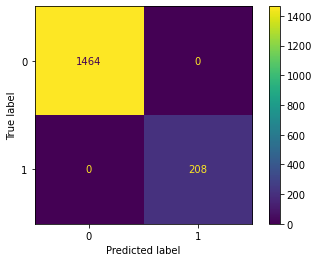

In [18]:
# modeling

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

print('*'*20)
# prediction

test_prediction = dtc.predict(X_test)
train_prediction = dtc.predict(X_train)

#evaluation

print('*'*20)
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

print('train_accuracy',accuracy_score(y_train,train_prediction))

print('test_accuracy',accuracy_score(y_test,test_prediction))

print('*'*20)


print(confusion_matrix(y_test,test_prediction))

print('*'*20)

print(plot_confusion_matrix(dtc,X_test,test_prediction))

In [19]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,X,y,cv=5)
print(score)
score.mean()

[0.96860987 0.97309417 0.97307002 0.96319569 0.96499102]


0.9685921536739903

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1451
           1       0.93      0.87      0.90       221

    accuracy                           0.97      1672
   macro avg       0.95      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



# KNN Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# model
knn_model=KNeighborsClassifier()

knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_prediction))
print(accuracy_score(y_train,train_prediction))

# cross validation score

from sklearn.model_selection import cross_val_score
score= cross_val_score(knn_model,X,y,cv=5)
print(score)
score.mean()

0.9114832535885168
0.9251282051282051
[0.91479821 0.91479821 0.91292639 0.90664273 0.91921005]


0.9136751173406541

# random forest technique

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42,bootstrap=False)
rfc.fit(X_train,y_train)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score)

score.mean()

train accuracy: 0.9760765550239234
test accuracy: 0.9987179487179487
[0.98116592 0.97757848 0.97486535 0.96947935 0.97666068]


0.9759499561230488